# Titanic Data (Have to find the no. of Survived)

Import multiple libraries and read data first

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
df=pd.read_csv("titanic_train.csv")

Set display columns , able to see the whole columns

In [3]:
pd.set_option("max_columns",40)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape #it has 891 rows and 12 columns

(891, 12)

In [6]:
df.ndim #it is 2d data

2

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.info() #it shows age has some missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df["Age"].isnull().sum()  #Age has 177 missing values

177

In [10]:
df["Age"].nunique()

88

In [14]:
df["Age"].mode()

0    24.0
dtype: float64

In [12]:
df["Age"]=df["Age"].fillna(24)

In [13]:
df["Age"].isnull().sum()

0

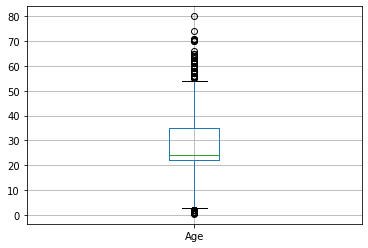

In [17]:
df.boxplot("Age")

Find the outliers , we do multiple techniques:
1) Z-score > 3
2) IQR

z=(df["Age"]-df["Age"].mean/df["Age"].std)

In [20]:
u=df["Age"].mean()

In [21]:
std=df["Age"].std()

In [38]:
otlr=[]
for i in df["Age"]:
    z=(i-u)/std
    if z>3:
        otlr.append(i)

In [24]:
print(otlr) # These are the outliers

[71.0, 70.5, 71.0, 80.0, 70.0, 70.0, 74.0]


In [40]:
q1=df["Age"].quantile(.25)
q1

22.0

In [41]:
q3=df["Age"].quantile(.75)
q3

35.0

In [27]:
iqr=q3-q1

In [28]:
iqr

13.0

In [29]:
outlier=q3+(1.5*iqr)

In [30]:
outlier

54.5

In [48]:
df.groupby(["Sex","Pclass"])["Age"].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Age, dtype: int64

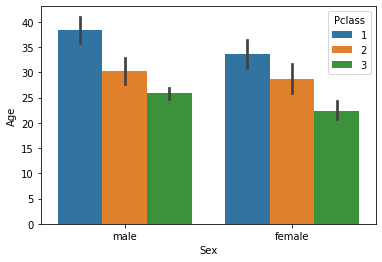

In [51]:
sns.barplot(x="Sex",y="Age",hue="Pclass",data=df)

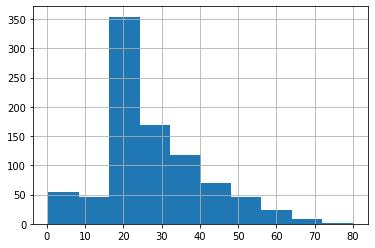

In [52]:
df["Age"].hist()

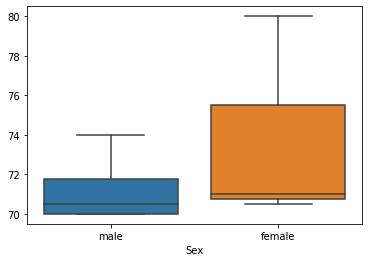

In [82]:
sns.boxplot(x="Sex",y=otlr,data=df)

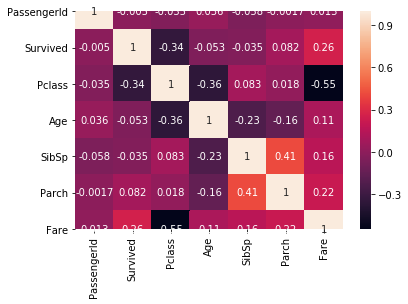

In [60]:
sns.heatmap(df.corr(),annot=True)

In [66]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [67]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

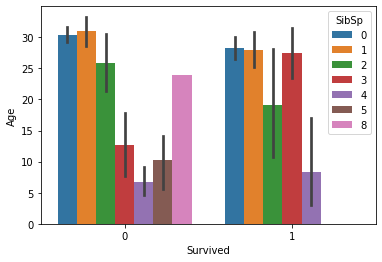

In [76]:
sns.barplot(x="Survived",y="Age",hue="SibSp",data=df)

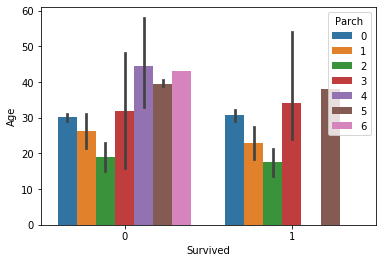

In [77]:
sns.barplot(x="Survived",y="Age",hue="Parch",data=df)

In [79]:
df.groupby(["Survived","Sex"])["Age"].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Age, dtype: int64

343 People are Survived in which 233 are Female and 109 are Male ,so there was a gender discrimination during they safe.

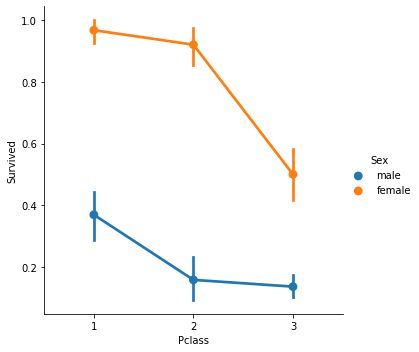

In [81]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df)